# Part II – Feedforward NNs, Autoencoders and Convolutional NNs

## This is a modification of previous notebook. Modifications: 

- Based on: `ML-ac-ficha6-PII.1.ipynb`
- Modified:
    - Before I trained an autoencoder.
    - But now I extract the encoder and the decoder. (which is a trivial change)

Neural Network Speccs:
- 784->128->64->10
- input->hidden->hidden->10
- . -(Relu)-> . -ELU-> . -softmax-> .

Training: 
- For 5 epochs.


**Data import:**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) =mnist.load_data()
# Normalize the images to the range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Neural Network:**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

In [3]:

# ENCODER #
# Define input layer
encoder_input = Input(shape=(28, 28, 1))
# Define the decoder layers
z = encoder_input
z = Flatten()(z)
z = Dense(64, activation='relu')(z)
z = Dense(10, activation='relu')(z)
encoder_layer = z 
encoder = Model(encoder_input, encoder_layer)

# DECODER #
## Input
decoder_input = Input(shape=encoder_layer.shape[1:])
##  Layers
y = decoder_input
y = Dense(64, activation='relu')(y)
y = Dense(784, activation='relu')(y)
y = Reshape((28, 28, 1))(y)
decoder_layer = y
## Model
decoder = Model(decoder_input, decoder_layer)

# AUTOENCODER #
## Model
autoencoder = Model(encoder_input, decoder(encoder(encoder_input)))
model = autoencoder
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 10)                50890     
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         51664     
                                                                 
Total params: 102554 (400.60 KB)
Trainable params: 102554 (400.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training


In [4]:
# Train the model
history = model.fit(train_images, train_images, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


750/750 [==============================] - 6s 5ms/step - loss: 0.0390 - accuracy: 0.8055 - val_loss: 0.0315 - val_accuracy: 0.8080
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0294 - accuracy: 0.8081 - val_loss: 0.0280 - val_accuracy: 0.8093
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0276 - accuracy: 0.8088 - val_loss: 0.0270 - val_accuracy: 0.8100
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0266 - accuracy: 0.8091 - val_loss: 0.0262 - val_accuracy: 0.8101
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0260 - accuracy: 0.8093 - val_loss: 0.0258 - val_accuracy: 0.8103


# Let's apply the Autoencoder:

We show examples of input images and it's output reconstructed images.

Details: The NN is `model.predict(test_images)`. Giving us the output `(NN(test_example1), NN(test_example2), ...)` or whatever. 

In [5]:
# Predict the test dataset
reconstructed_images = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


1. I define an visualizer function that compares two image sets, `display_images(orig, recon)`.
2. I apply it to (`test_images`, `reconstructed_images`).

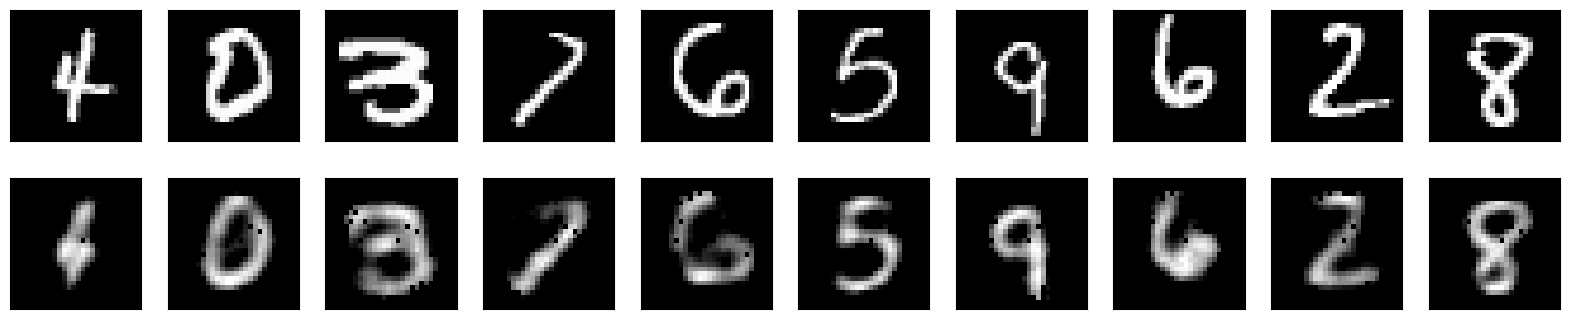

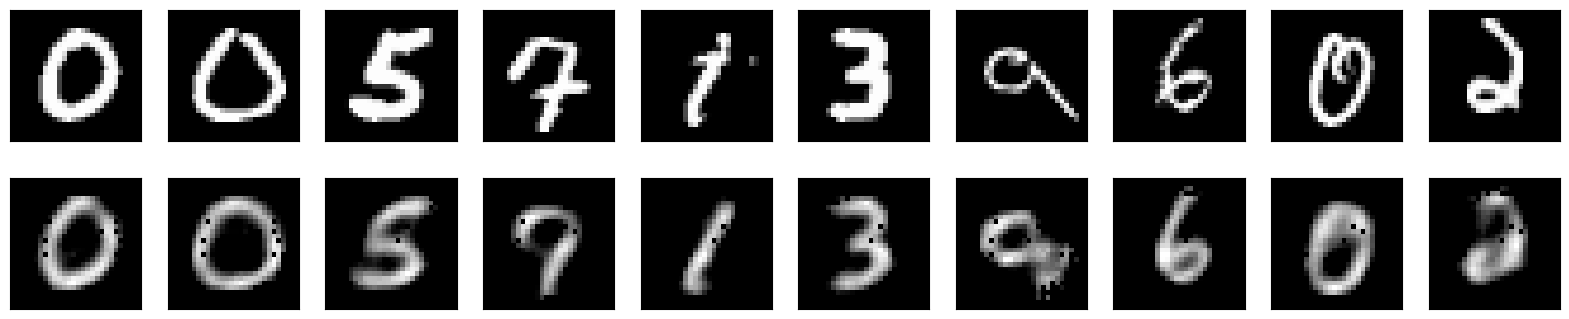

In [6]:
# Function to visualize the original_picture's and the predicted_picture's.
def display_images(orig, recon):
    # Randomly select 20 unique indices to display
    indices = np.random.choice(len(orig), 20, replace=False) #Random indices
    # indices = np.arange(20) #Non-Random indices

    for j in range(2):  # Two loops for two separate figures
        plt.figure(figsize=(20, 4))
        for i in range(10):  # Each figure displays 10 pairs of images
            index = indices[j * 10 + i]

            # Display original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(orig[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display reconstruction
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(recon[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

# Show the original and reconstructed images
display_images(test_images, reconstructed_images)


# OBSOLETE START#
# Note: You can test this by putting it inside the `display_images`` function if you want.
# Observation: I'm getting extra dead/black Pixels.
# Hypothesis: It's because the low/white values underflow, to being high/black again.
# Observation: Using np.max/min I observe the original_data range is [0,1], but the reconstructed_data range is [0, 0.0,1.823].
# Observation: Experiments show that imshow is weird. 
    # Obs1: High values are white, low are black.
    # Obs2: It looks at the range of values [a,b], and sets a to black and b to white, and in between to shades of gray.
# Conclusion: I thin kthe pixels are just dead, it's not an overflow problem.
#print(f"value range in 'orig' is: [{np.min(orig)},{np.max(orig)}]")
#print(f"value range in 'recon' is: [{np.min(recon)},{np.max(recon)}]")
# Obsolete: My solution for this was to clip the values to the range [0, 1], but it's pointless.
#orig = np.clip(orig, 0.9999, 1.0)
#recon = np.clip(recon, 0, 1)
#print(f"value range in 'orig' after is: [{np.min(orig)},{np.max(orig)}]")
#print(f"value range in 'recon' after is: [{np.min(recon)},{np.max(recon)}]")
# OBSOLETE END#

**Plot accuracy and loss, with epochs:**

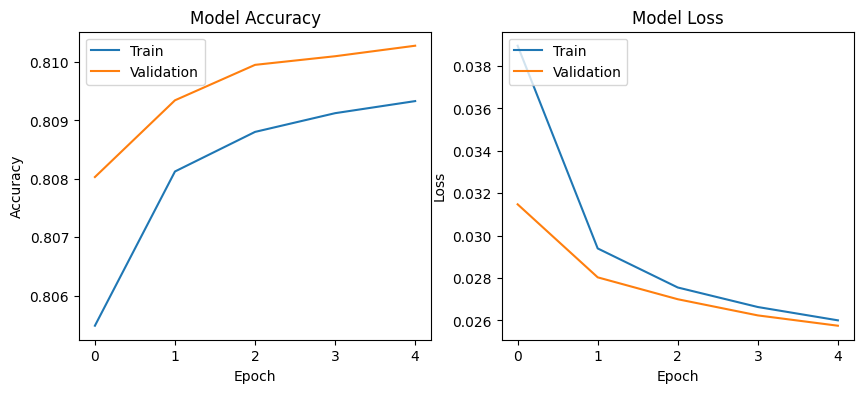

In [7]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)

# Let's display the encoder: (not as meaningful ofc)
I intend tod o the same as above basically. We visualize input data and the output encoded data/

In [8]:
# Predict the test dataset
encoded_images = encoder.predict(test_images)

313/313 [==============================] - 1s 2ms/step


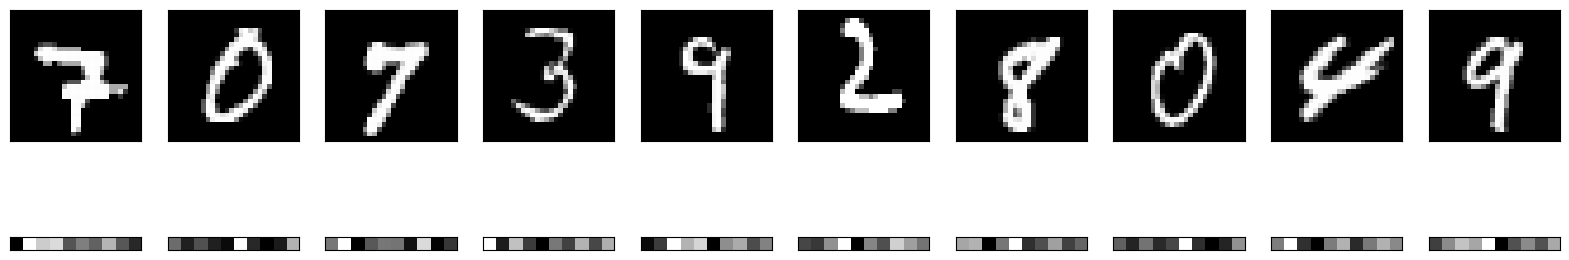

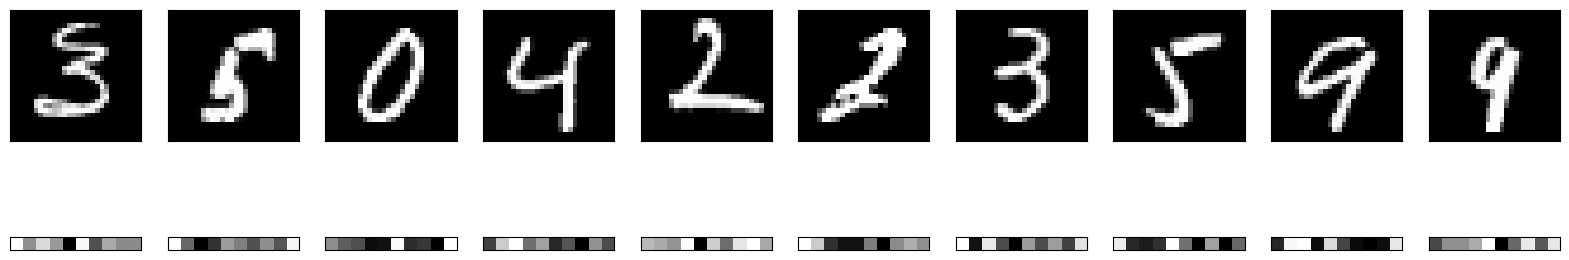

In [9]:
# Function to visualize the original_picture's and the predicted_picture's.
def display_encoder(orig, encod):
    # Randomly select 20 unique indices to display
    indices = np.random.choice(len(orig), 20, replace=False) #Random indices
    # indices = np.arange(20) #Non-Random indices


    for j in range(2):  # Two loops for two separate figures
        plt.figure(figsize=(20, 4))
        for i in range(10):  # Each figure displays 10 pairs of images
            index = indices[j * 10 + i]

            # Display original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(orig[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display encoded
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(encod[index].reshape(1, 10))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

display_encoder(test_images, encoded_images)



Question: What values do the `decoded_images` range in: (huh, I must've forgotten something I did to them, the range seems to be too perfect)

In [10]:
[np.min(encoded_images),np.max(encoded_images)]

[0.0, 17.825794]

# Let's display the DECODER

I intend to decode `(1,0,0,0,...)`, `(0,1,0,..)`, etc. 
This would make more intuitive sense if:
- If `(0,0,0,0,...)` printed a blank image, but it doesn't. The neural network isn't centralized in a sense.
- If `1` meant anything as opposed to `1231`, ie, if the data was normalized, such that `(1,0,0,0,0,...)` represents a variation from `(0,0,0,...)` rather than it being a completely random value.
That being said the deeper the decoder is the less this analysis means anything, the less anything can be understood by looking at the outputs of `(t,0,0,0,...)` for whatever `t`.


In [11]:
# Make up some data
encoded_images = np.eye(10)
# Predict the test dataset
decoded_images = decoder.predict(encoded_images)

1/1 [==============================] - 0s 74ms/step


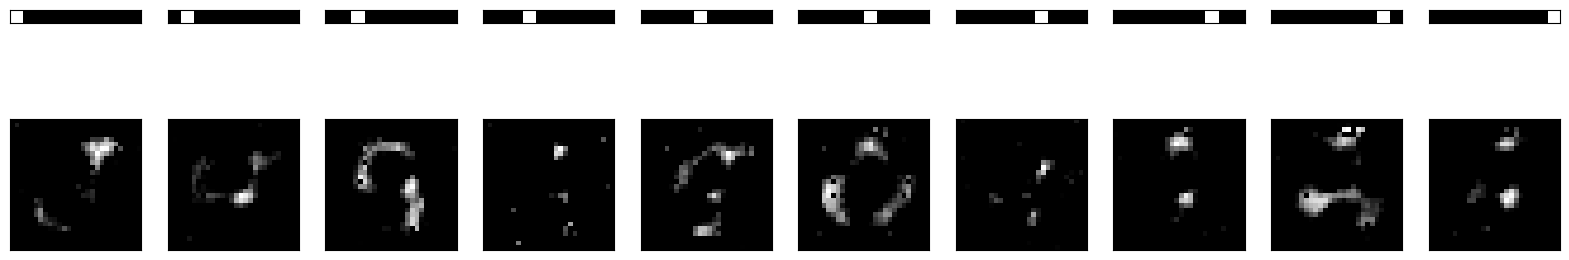

In [12]:
# Function to visualize the original_picture's and the predicted_picture's.
def display_decoder(encod, decod):
    # Randomly select 20 unique indices to display
    # indices = np.random.choice(len(encod), 20, replace=False) #Random indices
    indices = np.arange(10) #Non-Random indices


    for j in range(1):  # Two loops for two separate figures
        plt.figure(figsize=(20, 4))
        for i in range(10):  # Each figure displays 10 pairs of images
            index = indices[j * 10 + i]

            # Display original
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(encod[index].reshape(1, 10))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # Display encoded
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(decod[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

# Show the encoded_images and decoded_images.
display_decoder(encoded_images, decoded_images)

# Let's apply the decoder again with higher values
Despite the suspiciously perfect range which probably suggest I'm forgetting something, I will now use my previous fake data that I fed into the decode,r but 9 times bigger, or smaller, etc.

If deubugging is needed check the types and shapes here:

1/1 [==============================] - 0s 36ms/step


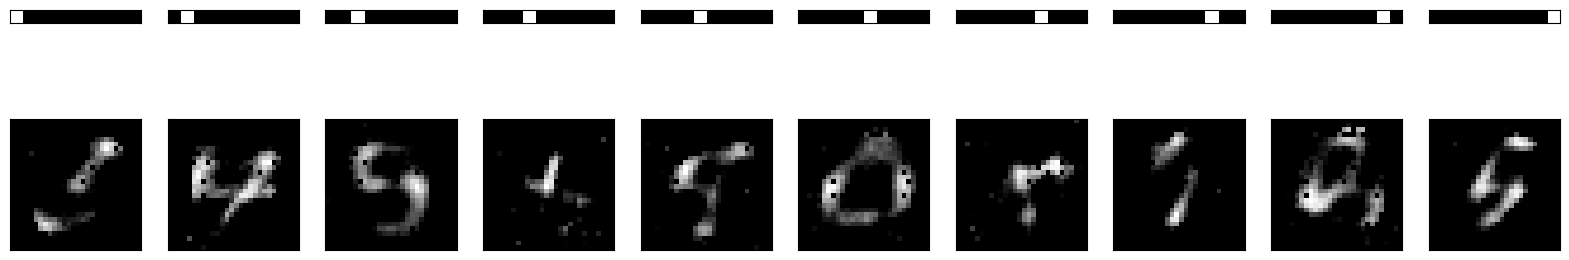

In [13]:
# Make up some data
encoded_images = np.eye(10)*9
# Predict the test dataset
decoded_images = decoder.predict(encoded_images)
# Display
display_decoder(encoded_images, decoded_images)

1/1 [==============================] - 0s 29ms/step


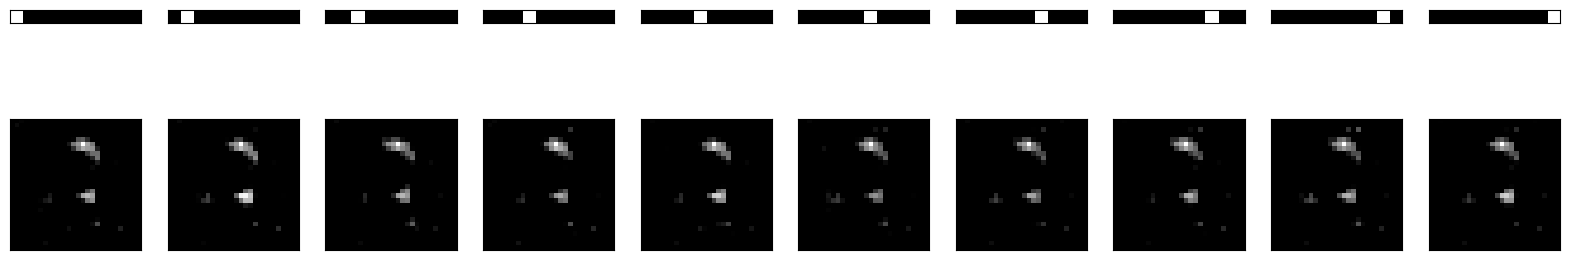

In [14]:

# Make up some data
encoded_images = np.eye(10)*0.1
# Predict the test dataset
decoded_images = decoder.predict(encoded_images)
# Display
display_decoder(encoded_images, decoded_images)

1/1 [==============================] - 0s 36ms/step


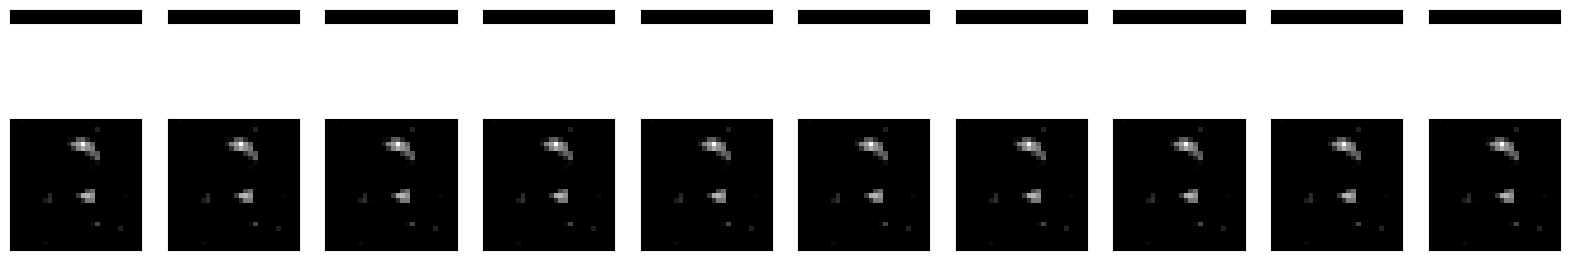

In [15]:

# Make up some data
encoded_images = np.eye(10)*0.0
# Predict the test dataset
decoded_images = decoder.predict(encoded_images)
# Display
display_decoder(encoded_images, decoded_images)